In [ ]:
class_num=3
#colors = ['blue','red','gray','green']
#colors = ['green','red','gray','blue']
#colors = ['green','gray','red','blue']
colors = ['green','gray','blue']
#colors = ['green','red','blue']

batch_size=32

result=""
for i in range(class_num):
  result=result+str(i)

In [ ]:

import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from PIL import Image
#from keras import layers, dense, Input, InputLayer, Flatten
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
from keras import layers
from keras import models
import random
from random import shuffle
#from keras.utils import np_utils
from keras import utils as np_utils
import json
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.layers import Activation, Add, BatchNormalization, Conv2D, Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
os.environ['CUDA_VISIBLE_DEVICES']="0";
run_opts = tf.compat.v1.RunOptions(report_tensor_allocations_upon_oom = True)
IMG_WIDTH=90
IMG_HEIGHT=69

def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

def create_dataset(img_folder):

    img_data_array=[]
    class_name=[]

    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):

            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unrar x "/content/drive/MyDrive/machine learning/test_train_cluster.rar"
dataset=np.load("test_train_cluster.npz")
train_img=dataset['arr_0']
train_class =dataset['arr_2']
train_label=dataset['arr_3']
#train_class=train_class.tolist();
with open(r"/content/drive/MyDrive/machine learningtrain_cluster.txt") as f:
   train_dict=json.loads(f.read())

test_img=dataset['arr_4']
test_class=dataset['arr_6']
test_label= dataset['arr_7']
#test_class=test_class.tolist();
with open(r"/content/drive/MyDrive/machine learning/test_cluster.txt") as f:
   test_dict=json.loads(f.read())


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/drive/MyDrive/machine learning/new_balance/test_train_cluster.rar

Extracting  test_train_cluster.npz                                         2%  5%  8% 10% 13% 16% 18% 21% 24% 27% 29% 32% 35% 37% 40% 43% 46% 48% 51% 54% 56% 59% 62% 65% 67% 70% 73% 75% 78% 81% 83% 86% 89% 92% 94% 97%100%  OK 
All OK


In [ ]:
#%% 標準化照片
for i in range(len(train_img)):
    train_img[i]=train_img[i]-np.mean(train_img[i])
for i in range(len(test_img)):
    test_img[i]=test_img[i]-np.mean(test_img[i])

#%%打亂train data順序
index=[i for i in range(len(train_img))]#先做一組與train data同樣長度之index
shuffle(index)#打亂
#再將img與label分別套入打亂的index
train_img=train_img[index]
train_label=train_label[index]

train_label_hot = np_utils.to_categorical(train_label)
test_label_hot = np_utils.to_categorical(test_label)

train_images = train_img
test_images = test_img
train_labels = train_label_hot
test_labels = test_label_hot

第一種(cbacb-a)

In [ ]:
import tensorflow
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, ReLU, BatchNormalization,ZeroPadding2D
from tensorflow.keras.layers import Add, GlobalAveragePooling2D

def stem(inputs):
    """ Construct the Stem Convolution Group
        inputs : input vector
    """
    # First Convolutional layer, where pooled feature maps will be reduced by 75%

    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu', kernel_initializer="he_normal")(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    return x

def learner(x):
    """ Construct the Learner
        x  : input to the learner
    """
    # First Residual Block Group of 64 filters
    x = residual_group(x, 64, 3,stride1=1)

    # Second Residual Block Group of 128 filters
    x = residual_group(x, 128, 4)

    # Third Residual Block Group of 256 filters
    x = residual_group(x, 256, 6)

    # Fourth Residual Block Group of 512 filters
    x = residual_group(x, 512, 3, False)
    return x


def residual_group(x, n_filters, n_blocks,stride1=2, conv=False):
    """ Construct a Residual Group
        x        : input to the group
        n_filters: number of filters
        n_blocks : number of blocks in the group
        conv     : flag to include the convolution block connector
    """
    x = residual_block_A(x, n_filters,)

    for _ in range(n_blocks-1):
        x = residual_block(x, n_filters)

    # Double the size of filters and reduce feature maps by 75% (strides=2, 2) to fit the next Residual Group
    if conv:
        x = conv_block(x, n_filters * 2)
    return x

def residual_block_A(x, n_filters):
    """ Construct a Residual Block of Convolutions
        x        : input into the block
        n_filters: number of filters
    """
    if n_filters==64:
      shortcut1 = Conv2D(n_filters, (3, 3), strides=(1, 1), padding="same",
                       kernel_initializer="he_normal")(x)
      shortcut = BatchNormalization()(shortcut1)
      x = Conv2D(n_filters, (3, 3), strides=(1, 1), padding="same",
                       kernel_initializer="he_normal")(x)
    else:
      shortcut1 = Conv2D(n_filters, (3, 3), strides=(2, 2), padding="same",
                       kernel_initializer="he_normal")(x)
      shortcut = BatchNormalization()(shortcut1)
      x = Conv2D(n_filters, (3, 3), strides=(2, 2), padding="same",
                       kernel_initializer="he_normal")(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(n_filters, (3, 3), strides=(1, 1), padding="same",kernel_initializer="he_normal")(x)
    x = BatchNormalization()(x)
    x = Add()([shortcut, x])
    x = Activation('relu')(x)
    return x

def residual_block(x, n_filters):
    """ Construct a Residual Block of Convolutions
        x        : input into the block
        n_filters: number of filters
    """
    shortcut = x
    x = Conv2D(n_filters, (3, 3), strides=(1, 1), padding="same",kernel_initializer="he_normal")(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(n_filters, (3, 3), strides=(1, 1), padding="same",kernel_initializer="he_normal")(x)
    x = BatchNormalization()(x)

    x = Add()([shortcut, x])
    x = Activation('relu')(x)
    return x

def classifier(x, n_classes):
    """ Construct the Classifier Group
        x         : input vector
        n_classes : number of output classes
    """
    # Pool at the end of all the convolutional residual blocks
    x = GlobalAveragePooling2D()(x)

    x=Dense(128, activation='relu', kernel_initializer='he_normal')(x)

    # Final Dense Outputting Layer for the outputs
    outputs = Dense(n_classes, activation='softmax', kernel_initializer='he_normal')(x)
    return outputs

# The input tensor
inputs = Input(shape=(90, 69, 3))

# The Stem Convolution Group
x = stem(inputs)

# The learner
x = learner(x)

# The Classifier for 1000 classes
outputs = classifier(x, class_num)

# Instantiate the Model
model = Model(inputs, outputs)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['acc'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 90, 69, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 45, 35, 64)           9472      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 45, 35, 64)           256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 45, 35, 64)           0         ['batch_normalization[0][0

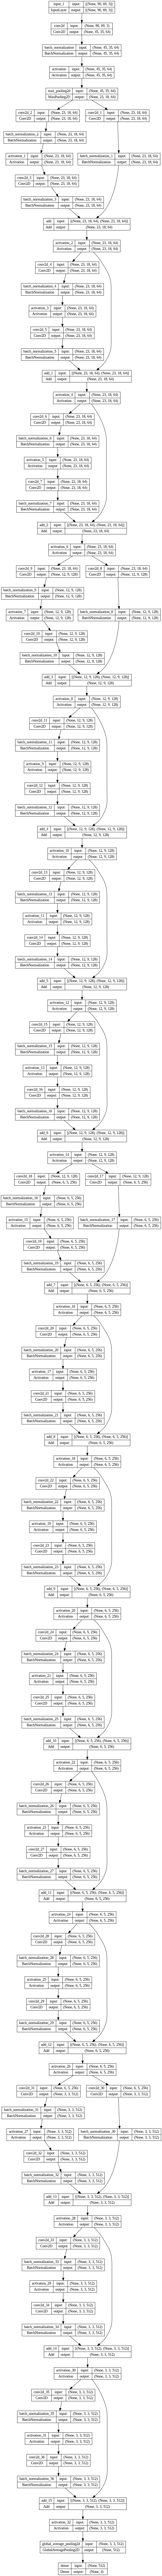

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

第二種(cbac/ba)

In [ ]:
import tensorflow
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, ReLU, BatchNormalization,ZeroPadding2D
from tensorflow.keras.layers import Add, GlobalAveragePooling2D

def stem(inputs):
    """ Construct the Stem Convolution Group
        inputs : input vector
    """
    # First Convolutional layer, where pooled feature maps will be reduced by 75%

    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu', kernel_initializer="he_normal")(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    return x

def learner(x):
    """ Construct the Learner
        x  : input to the learner
    """
    # First Residual Block Group of 64 filters
    x = residual_group(x, 64, 3,stride1=1)

    # Second Residual Block Group of 128 filters
    x = residual_group(x, 128, 4)

    # Third Residual Block Group of 256 filters
    x = residual_group(x, 256, 6)

    # Fourth Residual Block Group of 512 filters
    x = residual_group(x, 512, 3, False)
    return x


def residual_group(x, n_filters, n_blocks,stride1=2, conv=False):
    """ Construct a Residual Group
        x        : input to the group
        n_filters: number of filters
        n_blocks : number of blocks in the group
        conv     : flag to include the convolution block connector
    """
    x = residual_block_A(x, n_filters,)

    for _ in range(n_blocks-1):
        x = residual_block(x, n_filters)

    # Double the size of filters and reduce feature maps by 75% (strides=2, 2) to fit the next Residual Group
    if conv:
        x = conv_block(x, n_filters * 2)
    return x

def residual_block_A(x, n_filters):
    """ Construct a Residual Block of Convolutions
        x        : input into the block
        n_filters: number of filters
    """
    if n_filters==64:
      shortcut1 = Conv2D(n_filters, (3, 3), strides=(1, 1), padding="same",
                       kernel_initializer="he_normal")(x)
      shortcut = BatchNormalization()(shortcut1)
      x = Conv2D(n_filters, (3, 3), strides=(1, 1), padding="same",
                       kernel_initializer="he_normal")(x)
    else:
      shortcut1 = Conv2D(n_filters, (3, 3), strides=(2, 2), padding="same",
                       kernel_initializer="he_normal")(x)
      shortcut = BatchNormalization()(shortcut1)
      x = Conv2D(n_filters, (3, 3), strides=(2, 2), padding="same",
                       kernel_initializer="he_normal")(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(n_filters, (3, 3), strides=(1, 1), padding="same",kernel_initializer="he_normal")(x)
    x = Add()([shortcut, x])
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return x

def residual_block(x, n_filters):
    """ Construct a Residual Block of Convolutions
        x        : input into the block
        n_filters: number of filters
    """
    shortcut = x
    x = Conv2D(n_filters, (3, 3), strides=(1, 1), padding="same",kernel_initializer="he_normal")(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(n_filters, (3, 3), strides=(1, 1), padding="same",kernel_initializer="he_normal")(x)


    x = Add()([shortcut, x])
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return x

def classifier(x, n_classes):
    """ Construct the Classifier Group
        x         : input vector
        n_classes : number of output classes
    """
    # Pool at the end of all the convolutional residual blocks
    x = GlobalAveragePooling2D()(x)

    # Final Dense Outputting Layer for the outputs
    outputs = Dense(n_classes, activation='softmax', kernel_initializer='he_normal')(x)
    return outputs

# The input tensor
inputs = Input(shape=(90, 69, 3))

# The Stem Convolution Group
x = stem(inputs)

# The learner
x = learner(x)

# The Classifier for 1000 classes
outputs = classifier(x, class_num)

# Instantiate the Model
model = Model(inputs, outputs)
# 模型编译
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001), metrics=['acc'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 90, 69, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 45, 35, 64)   9472        ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 45, 35, 64)  256         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 45, 35, 64)   0           ['batch_normalization[0][0]']

第三種(cbacba)

In [ ]:
import tensorflow
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, ReLU, BatchNormalization,ZeroPadding2D
from tensorflow.keras.layers import Add, GlobalAveragePooling2D

def stem(inputs):
    """ Construct the Stem Convolution Group
        inputs : input vector
    """
    # First Convolutional layer, where pooled feature maps will be reduced by 75%

    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu', kernel_initializer="he_normal")(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    return x

def learner(x):
    """ Construct the Learner
        x  : input to the learner
    """
    # First Residual Block Group of 64 filters
    x = residual_group(x, 64, 3,stride1=1)

    # Second Residual Block Group of 128 filters
    x = residual_group(x, 128, 4)

    # Third Residual Block Group of 256 filters
    x = residual_group(x, 256, 6)

    # Fourth Residual Block Group of 512 filters
    x = residual_group(x, 512, 3, False)
    return x


def residual_group(x, n_filters, n_blocks,stride1=2, conv=False):
    """ Construct a Residual Group
        x        : input to the group
        n_filters: number of filters
        n_blocks : number of blocks in the group
        conv     : flag to include the convolution block connector
    """
    x = residual_block_A(x, n_filters,)

    for _ in range(n_blocks-1):
        x = residual_block(x, n_filters)

    # Double the size of filters and reduce feature maps by 75% (strides=2, 2) to fit the next Residual Group
    if conv:
        x = conv_block(x, n_filters * 2)
    return x

def residual_block_A(x, n_filters):
    """ Construct a Residual Block of Convolutions
        x        : input into the block
        n_filters: number of filters
    """
    if n_filters==64:
      shortcut1 = Conv2D(n_filters, (3, 3), strides=(1, 1), padding="same",
                       kernel_initializer="he_normal")(x)
      shortcut = BatchNormalization()(shortcut1)
      x = Conv2D(n_filters, (3, 3), strides=(1, 1), padding="same",
                       kernel_initializer="he_normal")(x)
    else:
      shortcut1 = Conv2D(n_filters, (3, 3), strides=(2, 2), padding="same",
                       kernel_initializer="he_normal")(x)
      shortcut = BatchNormalization()(shortcut1)
      x = Conv2D(n_filters, (3, 3), strides=(2, 2), padding="same",
                       kernel_initializer="he_normal")(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(n_filters, (3, 3), strides=(1, 1), padding="same",kernel_initializer="he_normal")(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Add()([shortcut, x])

    return x

def residual_block(x, n_filters):
    """ Construct a Residual Block of Convolutions
        x        : input into the block
        n_filters: number of filters
    """
    shortcut = x
    x = Conv2D(n_filters, (3, 3), strides=(1, 1), padding="same",kernel_initializer="he_normal")(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(n_filters, (3, 3), strides=(1, 1), padding="same",kernel_initializer="he_normal")(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Add()([shortcut, x])

    return x

def classifier(x, n_classes):
    """ Construct the Classifier Group
        x         : input vector
        n_classes : number of output classes
    """
    # Pool at the end of all the convolutional residual blocks
    x = GlobalAveragePooling2D()(x)

    # Final Dense Outputting Layer for the outputs
    outputs = Dense(n_classes, activation='softmax', kernel_initializer='he_normal')(x)
    return outputs

# The input tensor
inputs = Input(shape=(90, 69, 3))

# The Stem Convolution Group
x = stem(inputs)

# The learner
x = learner(x)

# The Classifier for 1000 classes
outputs = classifier(x, class_num)

# Instantiate the Model
model = Model(inputs, outputs)

model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001), metrics=['acc'])
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 90, 69, 3)]  0           []                               
                                                                                                  
 conv2d_37 (Conv2D)             (None, 45, 35, 64)   9472        ['input_2[0][0]']                
                                                                                                  
 batch_normalization_37 (BatchN  (None, 45, 35, 64)  256         ['conv2d_37[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_33 (Activation)     (None, 45, 35, 64)   0           ['batch_normalization_37[0]

第四種(bacbac)

In [ ]:
import tensorflow
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, ReLU, BatchNormalization,ZeroPadding2D
from tensorflow.keras.layers import Add, GlobalAveragePooling2D

def stem(inputs):
    """ Construct the Stem Convolution Group
        inputs : input vector
    """
    # First Convolutional layer, where pooled feature maps will be reduced by 75%

    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu', kernel_initializer="he_normal")(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    return x

def learner(x):
    """ Construct the Learner
        x  : input to the learner
    """
    # First Residual Block Group of 64 filters
    x = residual_group(x, 64, 3,stride1=1)

    # Second Residual Block Group of 128 filters
    x = residual_group(x, 128, 4)

    # Third Residual Block Group of 256 filters
    x = residual_group(x, 256, 6)

    # Fourth Residual Block Group of 512 filters
    x = residual_group(x, 512, 3, False)
    return x


def residual_group(x, n_filters, n_blocks,stride1=2, conv=False):
    """ Construct a Residual Group
        x        : input to the group
        n_filters: number of filters
        n_blocks : number of blocks in the group
        conv     : flag to include the convolution block connector
    """
    x = residual_block_A(x, n_filters,)

    for _ in range(n_blocks-1):
        x = residual_block(x, n_filters)

    # Double the size of filters and reduce feature maps by 75% (strides=2, 2) to fit the next Residual Group
    if conv:
        x = conv_block(x, n_filters * 2)
    return x

def residual_block_A(x, n_filters):
    """ Construct a Residual Block of Convolutions
        x        : input into the block
        n_filters: number of filters
    """
    if n_filters==64:
      shortcut1 = Conv2D(n_filters, (3, 3), strides=(1, 1), padding="same",
                       kernel_initializer="he_normal")(x)
      shortcut = BatchNormalization()(shortcut1)
      x = BatchNormalization()(x)
      x = Activation('relu')(x)
      x = Conv2D(n_filters, (3, 3), strides=(1, 1), padding="same",
                       kernel_initializer="he_normal")(x)
    else:
      shortcut1 = Conv2D(n_filters, (3, 3), strides=(2, 2), padding="same",
                       kernel_initializer="he_normal")(x)
      shortcut = BatchNormalization()(shortcut1)
      x = BatchNormalization()(x)
      x = Activation('relu')(x)
      x = Conv2D(n_filters, (3, 3), strides=(2, 2), padding="same",
                       kernel_initializer="he_normal")(x)


    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(n_filters, (3, 3), strides=(1, 1), padding="same",kernel_initializer="he_normal")(x)
    x = Add()([shortcut, x])

    return x

def residual_block(x, n_filters):
    """ Construct a Residual Block of Convolutions
        x        : input into the block
        n_filters: number of filters
    """
    shortcut = x
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(n_filters, (3, 3), strides=(1, 1), padding="same",kernel_initializer="he_normal")(x)

    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(n_filters, (3, 3), strides=(1, 1), padding="same",kernel_initializer="he_normal")(x)

    x = Add()([shortcut, x])

    return x

def classifier(x, n_classes):
    """ Construct the Classifier Group
        x         : input vector
        n_classes : number of output classes
    """
    # Pool at the end of all the convolutional residual blocks
    x = GlobalAveragePooling2D()(x)

    #x=Dense(128, activation='relu', kernel_initializer='he_normal')(x)

    # Final Dense Outputting Layer for the outputs
    outputs = Dense(n_classes, activation='softmax', kernel_initializer='he_normal')(x)
    return outputs

# The input tensor
inputs = Input(shape=(90, 69, 3))

# The Stem Convolution Group
x = stem(inputs)

# The learner
x = learner(x)

# The Classifier for 1000 classes
outputs = classifier(x, class_num)

# Instantiate the Model
model = Model(inputs, outputs)

model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001), metrics=['acc'])
model.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 90, 69, 3)]  0           []                               
                                                                                                  
 conv2d_111 (Conv2D)            (None, 45, 35, 64)   9472        ['input_4[0][0]']                
                                                                                                  
 batch_normalization_111 (Batch  (None, 45, 35, 64)  256         ['conv2d_111[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_99 (Activation)     (None, 45, 35, 64)   0           ['batch_normalization_111[0

第五種(acbacb)

In [ ]:
import tensorflow
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, ReLU, BatchNormalization,ZeroPadding2D
from tensorflow.keras.layers import Add, GlobalAveragePooling2D

def stem(inputs):
    """ Construct the Stem Convolution Group
        inputs : input vector
    """
    # First Convolutional layer, where pooled feature maps will be reduced by 75%

    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu', kernel_initializer="he_normal")(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    return x

def learner(x):
    """ Construct the Learner
        x  : input to the learner
    """
    # First Residual Block Group of 64 filters
    x = residual_group(x, 64, 3,stride1=1)

    # Second Residual Block Group of 128 filters
    x = residual_group(x, 128, 4)

    # Third Residual Block Group of 256 filters
    x = residual_group(x, 256, 6)

    # Fourth Residual Block Group of 512 filters
    x = residual_group(x, 512, 3, False)
    return x


def residual_group(x, n_filters, n_blocks,stride1=2, conv=False):
    """ Construct a Residual Group
        x        : input to the group
        n_filters: number of filters
        n_blocks : number of blocks in the group
        conv     : flag to include the convolution block connector
    """
    x = residual_block_A(x, n_filters,)

    for _ in range(n_blocks-1):
        x = residual_block(x, n_filters)

    # Double the size of filters and reduce feature maps by 75% (strides=2, 2) to fit the next Residual Group
    if conv:
        x = conv_block(x, n_filters * 2)
    return x

def residual_block_A(x, n_filters):
    """ Construct a Residual Block of Convolutions
        x        : input into the block
        n_filters: number of filters
    """
    if n_filters==64:
      shortcut1 = Conv2D(n_filters, (3, 3), strides=(1, 1), padding="same",kernel_initializer="he_normal")(x)
      shortcut = BatchNormalization()(shortcut1)
      x = Activation('relu')(x)
      x = Conv2D(n_filters, (3, 3), strides=(1, 1), padding="same",kernel_initializer="he_normal")(x)
    else:
      shortcut1 = Conv2D(n_filters, (3, 3), strides=(2, 2), padding="same",kernel_initializer="he_normal")(x)
      shortcut = BatchNormalization()(shortcut1)
      x = Activation('relu')(x)
      x = Conv2D(n_filters, (3, 3), strides=(2, 2), padding="same",kernel_initializer="he_normal")(x)


    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(n_filters, (3, 3), strides=(1, 1), padding="same",kernel_initializer="he_normal")(x)
    x = BatchNormalization()(x)
    x = Add()([shortcut, x])

    return x

def residual_block(x, n_filters):
    """ Construct a Residual Block of Convolutions
        x        : input into the block
        n_filters: number of filters
    """
    shortcut = x

    x = Activation('relu')(x)
    x = Conv2D(n_filters, (3, 3), strides=(1, 1), padding="same",kernel_initializer="he_normal")(x)
    x = BatchNormalization()(x)

    x = Activation('relu')(x)
    x = Conv2D(n_filters, (3, 3), strides=(1, 1), padding="same",kernel_initializer="he_normal")(x)
    x = BatchNormalization()(x)
    x = Add()([shortcut, x])

    return x

def classifier(x, n_classes):
    """ Construct the Classifier Group
        x         : input vector
        n_classes : number of output classes
    """
    # Pool at the end of all the convolutional residual blocks
    x = GlobalAveragePooling2D()(x)

    # Final Dense Outputting Layer for the outputs
    outputs = Dense(n_classes, activation='softmax', kernel_initializer='he_normal')(x)
    return outputs

# The input tensor
inputs = Input(shape=(90, 69, 3))

# The Stem Convolution Group
x = stem(inputs)

# The learner
x = learner(x)

# The Classifier for 1000 classes
outputs = classifier(x,class_num)

# Instantiate the Model
model = Model(inputs, outputs)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['acc'])
model.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 90, 69, 3)]  0           []                               
                                                                                                  
 conv2d_148 (Conv2D)            (None, 45, 35, 64)   9472        ['input_5[0][0]']                
                                                                                                  
 batch_normalization_148 (Batch  (None, 45, 35, 64)  256         ['conv2d_148[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_132 (Activation)    (None, 45, 35, 64)   0           ['batch_normalization_148[

第六種(cc)

In [ ]:
import tensorflow
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, ReLU, BatchNormalization,ZeroPadding2D
from tensorflow.keras.layers import Add, GlobalAveragePooling2D

def stem(inputs):
    """ Construct the Stem Convolution Group
        inputs : input vector
    """
    # First Convolutional layer, where pooled feature maps will be reduced by 75%

    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu', kernel_initializer="he_normal")(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    return x

def learner(x):
    """ Construct the Learner
        x  : input to the learner
    """
    # First Residual Block Group of 64 filters
    x = residual_group(x, 64, 3,stride1=1)

    # Second Residual Block Group of 128 filters
    x = residual_group(x, 128, 4)

    # Third Residual Block Group of 256 filters
    x = residual_group(x, 256, 6)

    # Fourth Residual Block Group of 512 filters
    x = residual_group(x, 512, 3, False)
    return x


def residual_group(x, n_filters, n_blocks,stride1=2, conv=False):
    """ Construct a Residual Group
        x        : input to the group
        n_filters: number of filters
        n_blocks : number of blocks in the group
        conv     : flag to include the convolution block connector
    """
    x = residual_block_A(x, n_filters,)

    for _ in range(n_blocks-1):
        x = residual_block(x, n_filters)

    # Double the size of filters and reduce feature maps by 75% (strides=2, 2) to fit the next Residual Group
    if conv:
        x = conv_block(x, n_filters * 2)
    return x

def residual_block_A(x, n_filters):
    """ Construct a Residual Block of Convolutions
        x        : input into the block
        n_filters: number of filters
    """
    if n_filters==64:
      shortcut1 = Conv2D(n_filters, (3, 3), strides=(1, 1), padding="same",kernel_initializer="he_normal")(x)
      shortcut = BatchNormalization()(shortcut1)


      x = Conv2D(n_filters, (3, 3), strides=(1, 1), padding="same",kernel_initializer="he_normal")(x)
    else:
      shortcut1 = Conv2D(n_filters, (3, 3), strides=(2, 2), padding="same",kernel_initializer="he_normal")(x)
      shortcut = BatchNormalization()(shortcut1)


      x = Conv2D(n_filters, (3, 3), strides=(2, 2), padding="same",kernel_initializer="he_normal")(x)

    x = Conv2D(n_filters, (3, 3), strides=(1, 1), padding="same",kernel_initializer="he_normal")(x)
    x = Add()([shortcut, x])

    return x

def residual_block(x, n_filters):
    """ Construct a Residual Block of Convolutions
        x        : input into the block
        n_filters: number of filters
    """
    shortcut = x

    x = Conv2D(n_filters, (3, 3), strides=(1, 1), padding="same",kernel_initializer="he_normal")(x)

    x = Conv2D(n_filters, (3, 3), strides=(1, 1), padding="same",kernel_initializer="he_normal")(x)

    x = Add()([shortcut, x])

    return x

def classifier(x, n_classes):
    """ Construct the Classifier Group
        x         : input vector
        n_classes : number of output classes
    """
    # Pool at the end of all the convolutional residual blocks
    x = GlobalAveragePooling2D()(x)



    # Final Dense Outputting Layer for the outputs
    outputs = Dense(n_classes, activation='softmax', kernel_initializer='he_normal')(x)
    return outputs

# The input tensor
inputs = Input(shape=(90, 69, 3))

# The Stem Convolution Group
x = stem(inputs)

# The learner
x = learner(x)

# The Classifier for 1000 classes
outputs = classifier(x,class_num)

# Instantiate the Model
model = Model(inputs, outputs)
# 模型编译
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['acc'])
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 90, 69, 3)]  0           []                               
                                                                                                  
 conv2d_37 (Conv2D)             (None, 45, 35, 64)   9472        ['input_2[0][0]']                
                                                                                                  
 batch_normalization_37 (BatchN  (None, 45, 35, 64)  256         ['conv2d_37[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_33 (Activation)     (None, 45, 35, 64)   0           ['batch_normalization_37[0]

In [ ]:
model_path='/content/drive/MyDrive/machine learning/new_balance/res34_1_cluster_new.h5'

Epoch 1/30

Epoch 1: val_acc improved from -inf to 0.48042, saving model to /content/drive/MyDrive/machine learning/new_balance/res34_1_d128_cluster_new.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


300/300 - 48s - loss: 0.2795 - acc: 0.9093 - val_loss: 3.2575 - val_acc: 0.4804 - lr: 0.0010 - 48s/epoch - 160ms/step
Epoch 2/30

Epoch 2: val_acc did not improve from 0.48042
300/300 - 19s - loss: 0.1486 - acc: 0.9511 - val_loss: 3.6859 - val_acc: 0.4229 - lr: 0.0010 - 19s/epoch - 62ms/step
Epoch 3/30

Epoch 3: val_acc improved from 0.48042 to 0.94250, saving model to /content/drive/MyDrive/machine learning/new_balance/res34_1_d128_cluster_new.h5
300/300 - 25s - loss: 0.1174 - acc: 0.9626 - val_loss: 0.1921 - val_acc: 0.9425 - lr: 0.0010 - 25s/epoch - 83ms/step
Epoch 4/30

Epoch 4: val_acc improved from 0.94250 to 0.97167, saving model to /content/drive/MyDrive/machine learning/new_balance/res34_1_d128_cluster_new.h5
300/300 - 25s - loss: 0.0939 - acc: 0.9678 - val_loss: 0.0946 - val_acc: 0.9717 - lr: 0.0010 - 25s/epoch - 83ms/step
Epoch 5/30

Epoch 5: val_acc did not improve from 0.97167
300/300 - 20s - loss: 0.0791 - acc: 0.9739 - val_loss: 0.1213 - val_acc: 0.9588 - lr: 0.0010 - 20

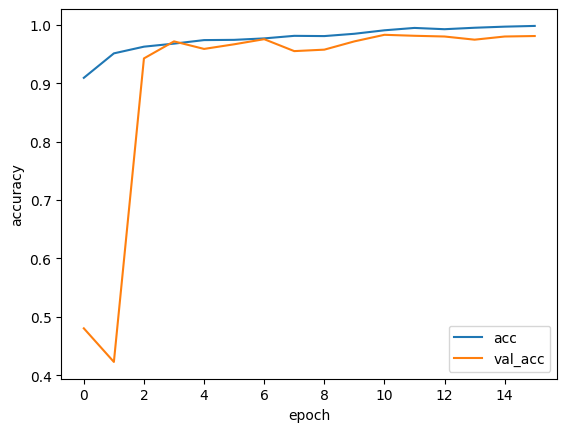

In [ ]:
from keras.callbacks import ReduceLROnPlateau,LearningRateScheduler,EarlyStopping,ModelCheckpoint
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                           patience=3, mode='min', verbose=1,
                           min_lr=1e-5)
# 設定earlystop條件
estop = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1,min_delta=0.005)

# 設定模型儲存條件
checkpoint = ModelCheckpoint(model_path, verbose=1,
                          monitor='val_acc', save_best_only=True,
                          mode='max',min_delta=0.005)
batch_size=32
history = model.fit(
        train_images, train_labels, batch_size=batch_size,
        epochs=30,
        validation_split=0.2,verbose=2, shuffle=True,
        callbacks=[checkpoint, estop, reduce_lr])

plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

In [ ]:
model = keras.models.load_model(model_path)
#model.summary()

In [ ]:
score, acc = model.evaluate(test_images, test_labels,batch_size=32)

94/94 [==============================] - 3s 21ms/step - loss: 0.0890 - acc: 0.9760


In [ ]:
pip install iteration_utilities

94/94 [==============================] - 3s 21ms/step
[[976  22   2]
 [ 14 982   4]
 [ 10  20 970]]


<Axes: >

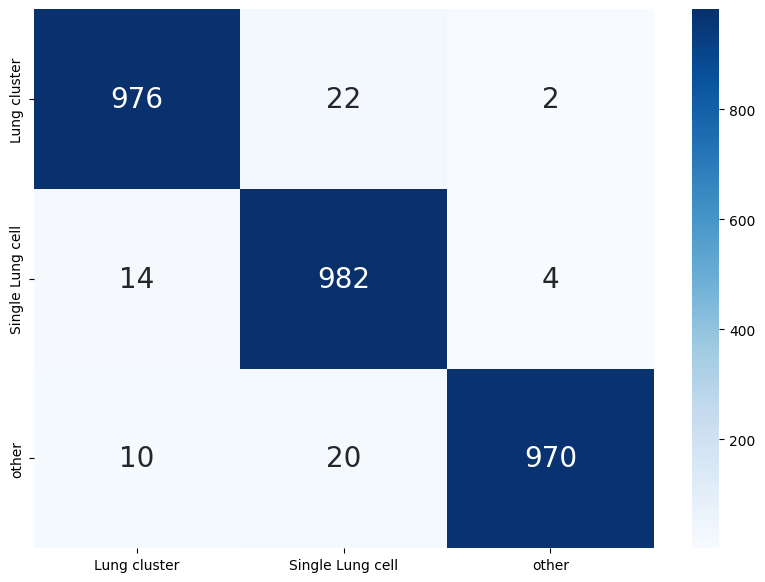

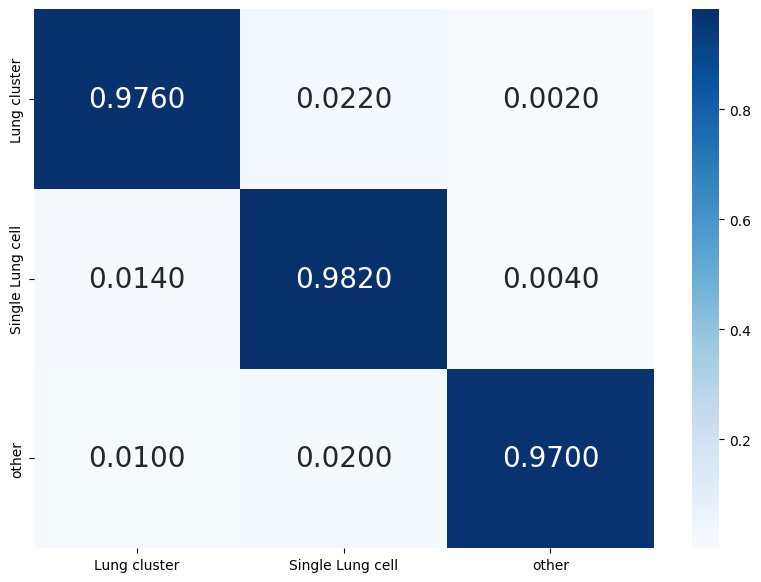

In [ ]:
#%%
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from os import listdir,walk
from os.path import isfile,join
import shutil

# test model
y_pred_hot = model.predict(test_img)
y_pred_labels = np.argmax(y_pred_hot, axis=1)
# plot confusion matrix
confusion_matrix = metrics.confusion_matrix(y_true=test_label, y_pred=y_pred_labels)
print(confusion_matrix)
temp=confusion_matrix.T/confusion_matrix.sum(axis=1)
confusion_matrix_standard=temp.T
#%%
df_cm = pd.DataFrame(confusion_matrix, index = [i for i in test_dict],
                  columns = [i for i in test_dict])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm,cmap='Blues',annot=True,fmt ='g' , annot_kws={"size":20})
#%%
df_cm = pd.DataFrame(confusion_matrix_standard, index = [i for i in test_dict],
                  columns = [i for i in test_dict])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm,cmap='Blues',annot=True,fmt ='.4f' , annot_kws={"size":20})


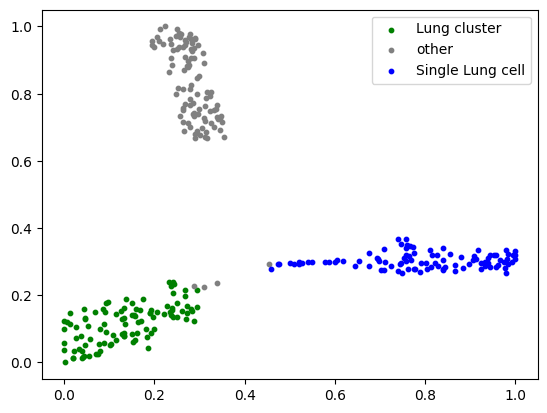

In [ ]:
#%% 縮小test量 每項各取100張
test_size=100;
small_test_label=[];
count=0;
for i in range(len(test_dict)):
    count=count+np.sum(test_label== i-1)
    for j in range(test_size):
        small_test_label.append(test_label[count+j]);
small_test_label=np.array(small_test_label);
small_test_img=[];
count=0;
for i in range(len(test_dict)):
    count=count+np.sum(test_label== i-1)
    for j in range(test_size):
        small_test_img.append(test_img[count+j]);
small_test_img=np.array(small_test_img);
#%%
from sklearn.manifold import TSNE
import numpy as np
from  matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from iteration_utilities import unique_everseen
from iteration_utilities import duplicates

model2 = tf.keras.Model(inputs=model.input, outputs=model.layers[-2].output)
features = model2(small_test_img)
labels = np.argmax(model(small_test_img), axis=-1)
tsne = TSNE(n_components=2,perplexity=40).fit_transform(features)
#

def scale_to_01_range(x):

    value_range = (np.max(x) - np.min(x))
    starts_from_zero = x - np.min(x)
    return starts_from_zero / value_range

tx = tsne[:, 0]
ty = tsne[:, 1]

tx = scale_to_01_range(tx)
ty = scale_to_01_range(ty)


classes=list(unique_everseen(duplicates(test_class)))
fig = plt.figure()
ax = fig.add_subplot(111)
for idx, c in enumerate(colors):
    indices = [i for i, l in enumerate(labels) if idx == l]
    current_tx = np.take(tx, indices)
    current_ty = np.take(ty, indices)
    ax.scatter(current_tx, current_ty, c=c, label=classes[idx],s=10)

ax.legend(loc='best')
plt.show()

94/94 [==============================] - 2s 14ms/step


0.9969845366687146

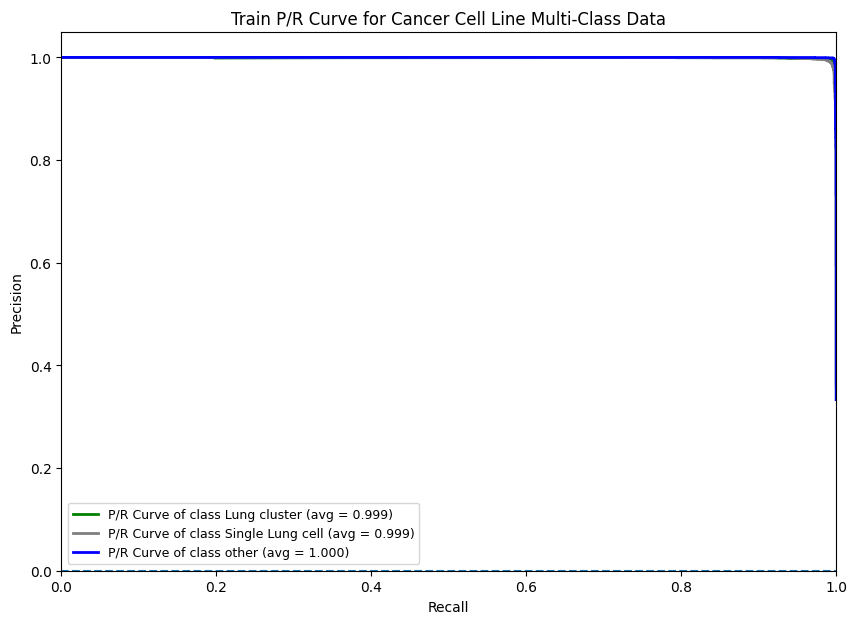

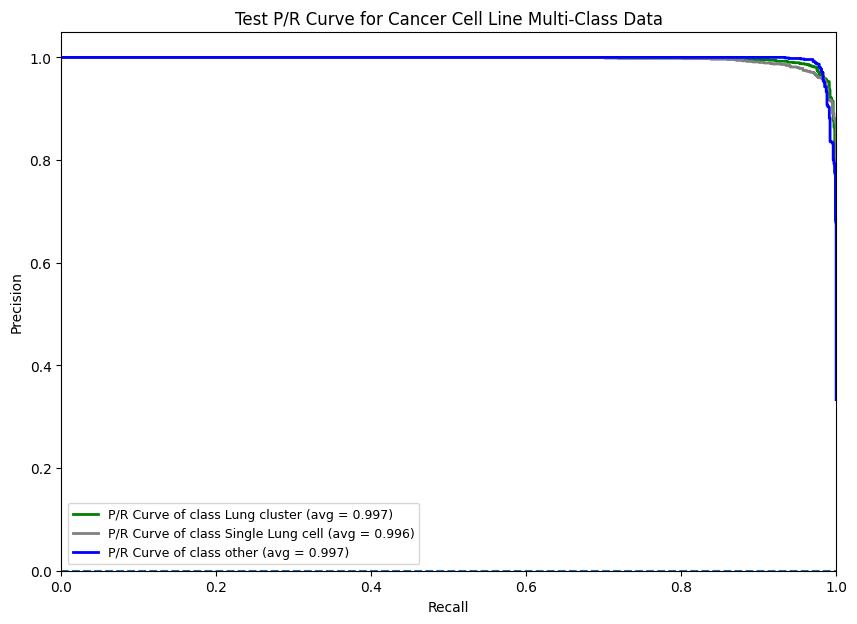

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Model, load_model
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, classification_report, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
from datetime import datetime
from time import time
from typing import Tuple
from itertools import cycle
def pr_curve(model, train_img: np.ndarray, train_label: np.ndarray,test_img: np.ndarray,test_label: np.ndarray,
      n_classes:int,train_dict: list,batch):
  classes_array=[i for i in range(n_classes)]
  feature_extractor = Model(inputs = model.inputs, outputs = model.get_layer(model.layers[-1].name).output)
  y_train_score = feature_extractor.predict(train_img, batch_size = batch)
  y_train_binary = label_binarize(train_label, classes =classes_array) # one hot encode train data
  y_test_score = feature_extractor.predict(test_img, batch_size = 32) # one hot encoded softmax predictions
  y_test_binary = label_binarize(test_label, classes = classes_array) # one hot encode the test data true labels

  # Precision-Recall Curves for train/val/test
  train_precision = dict()
  train_recall = dict()
  train_avg_precision = dict()
  test_precision = dict()
  test_recall = dict()
  test_avg_precision = dict()

  for i in range(n_classes):
    train_precision[i], train_recall[i], _ = precision_recall_curve(y_train_binary[:, i], y_train_score[:, i])
    train_avg_precision[i] = average_precision_score(y_train_binary[:, i], y_train_score[:, i])
    test_precision[i], test_recall[i], _ = precision_recall_curve(y_test_binary[:, i], y_test_score[:, i])
    test_avg_precision[i] = average_precision_score(y_test_binary[:, i], y_test_score[:, i])



    # plot each class curve on single graph for multi-class one vs all classification
  plt.figure(figsize = (10,7))
  for i, color, lbl in zip(range(n_classes), colors, train_dict):
    plt.plot(train_recall[i], train_precision[i], color = color, lw = 2,
    label = 'P/R Curve of class {0} (avg = {1:0.3f})'.format(lbl, train_avg_precision[i]))
  plt.hlines(0, xmin = 0, xmax = 1.0, linestyle = 'dashed')
  plt.xlim([0, 1])
  plt.ylim([0, 1.05])
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Train P/R Curve for Cancer Cell Line Multi-Class Data')
  plt.legend(loc = 'lower left', prop = {'size': 9})
  #fullpath = save_plot_path.joinpath('train_pr_curve.png')
  #plt.savefig(fullpath)
  #plt.close()
  plt.figure(figsize = (10,7))
  for i, color, lbl in zip(range(n_classes), colors, train_dict):
    plt.plot(test_recall[i], test_precision[i], color = color, lw = 2,
    label = 'P/R Curve of class {0} (avg = {1:0.3f})'.format(lbl, test_avg_precision[i]))
  plt.hlines(0, xmin = 0, xmax = 1.0, linestyle = 'dashed')
  plt.xlim([0, 1])
  plt.ylim([0, 1.05])
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Test P/R Curve for Cancer Cell Line Multi-Class Data')
  plt.legend(loc = 'lower left', prop = {'size': 9})
  #fullpath = save_plot_path.joinpath('test_pr_curve.png')
  #plt.savefig(fullpath)
  #plt.close()
  return test_avg_precision

test_avg_precision=pr_curve(model, train_img, train_label,test_img,test_label, class_num,train_dict,batch_size)
sum(test_avg_precision.values())/len(test_avg_precision)